# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
df = pd.read_excel('/Users/yuta-uebayashi/Desktop/Lede課題一覧/NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx')
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
len(df)

81937

In [4]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

In [5]:
df = pd.read_excel('/Users/yuta-uebayashi/Desktop/Lede課題一覧/NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', nrows=30000)

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [6]:
print("'Animal Gender' refers to the gender of dogs.")
print("'Spayed or Neut' shows whether the dog is spayed or neutered (Yes or No).")

'Animal Gender' refers to the gender of dogs.
'Spayed or Neut' shows whether the dog is spayed or neutered (Yes or No).


# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

1:What are the most common dog breeds in New York City?

2:Are spayed or neutered dogs more likely to be vaccinated?

3:Which zip codes have the highest number of licensed dogs?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

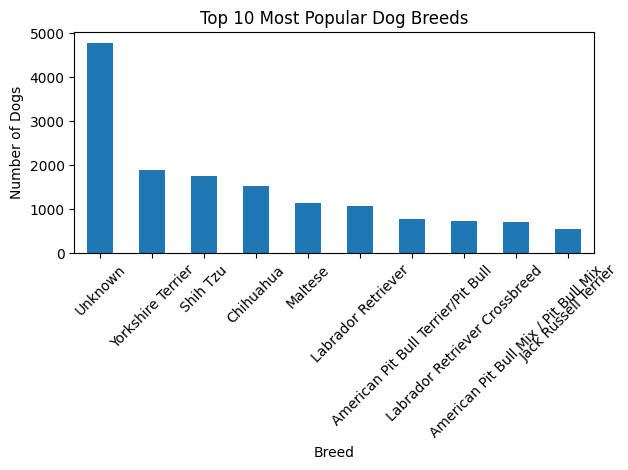

In [7]:
import matplotlib.pyplot as plt
top_breeds = df['Primary Breed'].value_counts().head(10)

top_breeds.plot(kind="bar")
plt.title("Top 10 Most Popular Dog Breeds")
plt.xlabel("Breed")
plt.ylabel("Number of Dogs")
plt.xticks(rotation=45)
plt.tight_layout()

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

...maybe "unknown" should just count as missing data?

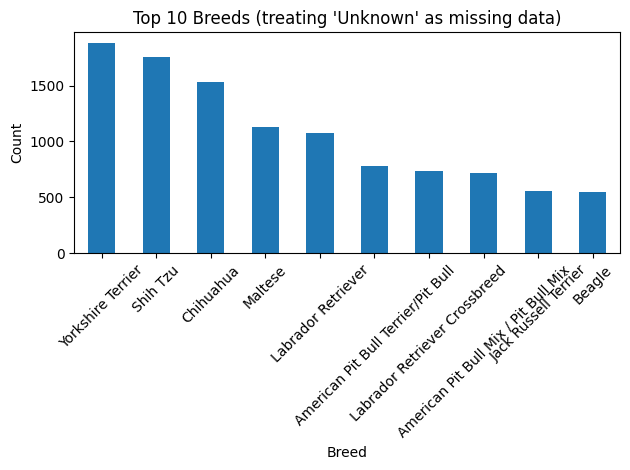

In [8]:
df["Primary Breed"] = df["Primary Breed"].replace("Unknown", pd.NA)

top_breeds_no_na = df["Primary Breed"].dropna().value_counts().head(10)

top_breeds_no_na.plot(kind="bar")
plt.title("Top 10 Breeds (treating 'Unknown' as missing data)")
plt.xlabel("Breed")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()

## What are the most popular dog names?

In [9]:
most_popular_name = df['Animal Name'].value_counts().head(5)
most_popular_name
print("'The most popular name is Max.")

'The most popular name is Max.


## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [10]:
df["Animal Name"].value_counts().get("Yuta", 0)

0

In [11]:
print(df["Animal Name"].value_counts().get("Max", 0))
print(df["Animal Name"].value_counts().get("Maxwell", 0))

202
11


## What percentage of dogs are guard dogs?

In [12]:
total_valid = df["Guard or Trained"].notna().sum()
guard_dogs = df["Guard or Trained"].value_counts().get("Yes", 0)

percentage = (guard_dogs / total_valid) * 100
print(f"{percentage:.2f}% of dogs (with valid data) are guard dogs.")

0.09% of dogs (with valid data) are guard dogs.


## What are the actual numbers?

In [13]:
df["Guard or Trained"].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll be a little more specific when using `.value_counts()`

In [14]:
df[df["Animal Name"].isna()].head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
3725,11230,NaN,M,<NA>,POODLE MIX,WHITE,NaN,NaN,2005-01-01,Yes,No,Yes,2015-04-15 13:22:50.647,2015-04-15,2017-04-09
4583,10312,NaN,F,Labrador Retriever,NaN,BLACK,NaN,NaN,2005-12-01,No,No,Yes,2015-04-26 18:08:16.533,2015-04-26,2016-05-30
4970,10021,NaN,F,German Shepherd Crossbreed,NaN,RUST,NaN,NaN,2004-01-01,Yes,No,Yes,2015-04-29 16:21:47.277,2015-04-29,2016-04-29
4992,11232,NaN,M,Beagle,NaN,Black,White,Tan,2014-03-01,No,NaN,No,2015-04-29 19:50:27.467,2015-04-29,2016-04-29
6190,11209,NaN,M,Yorkshire Terrier,NaN,Black,Tan,NaN,2015-02-01,No,NaN,No,2015-05-06 17:58:43.930,2015-05-06,2016-05-06


## Fill in all of those empty "Guard or Trained" columns with "No"

In this case, it seems nicer than missing data. Then check your result with another `.value_counts()`

In [15]:
df["Guard or Trained"] = df["Guard or Trained"].fillna("No")
df["Guard or Trained"].value_counts()

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [16]:
guard_dogs = df[df["Guard or Trained"] == "Yes"]
top_guard_breeds = guard_dogs["Primary Breed"].value_counts().head(10)
top_guard_breeds

Primary Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

If `Animal Birth` is a datetime it makes things much easier.

In [17]:
df["Animal Birth"].head()
df["year"] = df["Animal Birth"].dt.year
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,<NA>,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,<NA>,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [18]:
from datetime import datetime

today = datetime.today()

df["age"] = (today - df["Animal Birth"]).dt.days // 365
df[["Animal Birth", "age"]].head()

average_age = df["age"].mean()
print(f"Average age of dogs: {average_age:.2f} years")

Average age of dogs: 15.38 years


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [19]:
neighborhoods = pd.read_csv('/Users/yuta-uebayashi/Desktop/zipcodes-neighborhoods.csv')
neighborhoods.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [20]:
merged = df.merge(neighborhoods, left_on="Owner Zip Code", right_on="zip", how="left")
merged.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,<NA>,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17,Upper West Side,10024.0,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,12,Southeast Bronx,10461.0,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013.0,Manhattan
3,10025,Buddy,M,<NA>,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,17,Upper West Side,10025.0,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,11,Greenwich Village and Soho,10013.0,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [21]:
bronx_dogs = merged[(merged["borough"] == "Bronx") & (merged["Animal Name"] != "Unknown")]
print(bronx_dogs["Animal Name"].value_counts().head(1))

brooklyn_dogs = merged[(merged["borough"] == "Brooklyn") & (merged["Animal Name"] != "Unknown")]
print(brooklyn_dogs["Animal Name"].value_counts().head(1))

ues_dogs = merged[(merged["neighborhood"] == "Upper East Side") & (merged["Animal Name"] != "Unknown")]
print(ues_dogs["Animal Name"].value_counts().head(1))

Animal Name
Bella    22
Name: count, dtype: int64
Animal Name
Max    46
Name: count, dtype: int64
Animal Name
Charlie    19
Name: count, dtype: int64


## What is the most common dog breed in each of the neighborhoods of NYC?

In [22]:
most_common_breeds = (
    merged[merged["Primary Breed"] != "Unknown"]
    .groupby("neighborhood")["Primary Breed"]
    .agg(lambda x: x.value_counts().idxmax())
)

most_common_breeds

neighborhood
Borough Park                                        Yorkshire Terrier
Bronx Park and Fordham                              Yorkshire Terrier
Bushwick and Williamsburg                           Yorkshire Terrier
Canarsie and Flatlands                                       Shih Tzu
Central Bronx                                       Yorkshire Terrier
Central Brooklyn                                             Shih Tzu
Central Harlem                                              Chihuahua
Central Queens                                      Yorkshire Terrier
Chelsea and Clinton                                         Chihuahua
East Harlem                                         Yorkshire Terrier
East New York and New Lots                          Yorkshire Terrier
Flatbush                                                     Shih Tzu
Gramercy Park and Murray Hill                       Yorkshire Terrier
Greenpoint                                                  Chihuahua
Greenwi

## What breed of dogs are the least likely to be spayed/neutered? Male or female?

In [23]:
not_fixed = merged[merged["Spayed or Neut"] == "No"]
print(not_fixed["Primary Breed"].value_counts().head(1))

filtered = merged[merged["Animal Gender"].isin(["F", "M"])]
print(filtered.groupby("Animal Gender")["Spayed or Neut"].value_counts(normalize=True))

Primary Breed
Yorkshire Terrier    537
Name: count, dtype: int64
Animal Gender  Spayed or Neut
F              Yes               0.857850
               No                0.142150
M              Yes               0.791856
               No                0.208144
Name: proportion, dtype: float64


## How many dogs are in each borough? Plot it in a graph.

When plotting, use `kind='barh'`. I didn't say this in class, but horizontal bar graphs are the only graphs I like!

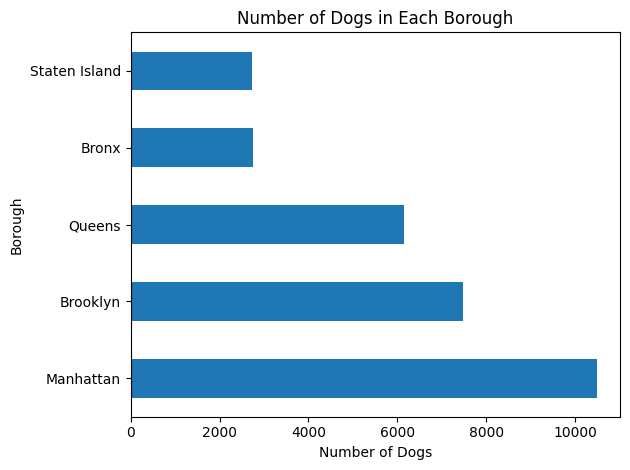

In [24]:
borough_counts = merged["borough"].value_counts()

borough_counts.plot(kind="barh")
plt.title("Number of Dogs in Each Borough")
plt.xlabel("Number of Dogs")
plt.ylabel("Borough")
plt.tight_layout()
plt.show()

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [25]:
population = pd.read_csv('/Users/yuta-uebayashi/Desktop/boro_population.csv')
population.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [26]:
dog_counts = merged["borough"].value_counts().reset_index()
dog_counts.columns = ["borough", "dog_count"]

In [27]:
boro_merged = dog_counts.merge(population, on="borough")

In [28]:
boro_merged["dogs_per_capita"] = boro_merged["dog_count"] / boro_merged["population"]

In [29]:
highest = boro_merged.sort_values("dogs_per_capita", ascending=False)
print(highest[["borough", "dogs_per_capita"]])

         borough  dogs_per_capita
0      Manhattan         0.006371
4  Staten Island         0.005746
1       Brooklyn         0.002832
2         Queens         0.002631
3          Bronx         0.001888


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [36]:
cleaned = merged[merged["Primary Breed"] != "Unknown"]

In [37]:
grouped = cleaned.groupby(["borough", "Primary Breed"]).size().reset_index(name="count")

In [38]:
top5_per_borough = (
    grouped.groupby("borough", group_keys=False)
    .apply(lambda x: x.sort_values("count", ascending=False).head(5))
)

/var/folders/kg/83hytcns50g9j51j8_nj0g4c0000gq/T/ipykernel_12742/3647990792.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values("count", ascending=False).head(5))


In [39]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [40]:
top5_per_borough = grouped.sort_values("count", ascending=False).groupby("borough").head(5)

In [41]:
import sys
!{sys.executable} -m pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: /Users/yuta-uebayashi/.pyenv/versions/3.11.8/bin/python -m pip install --upgrade pip


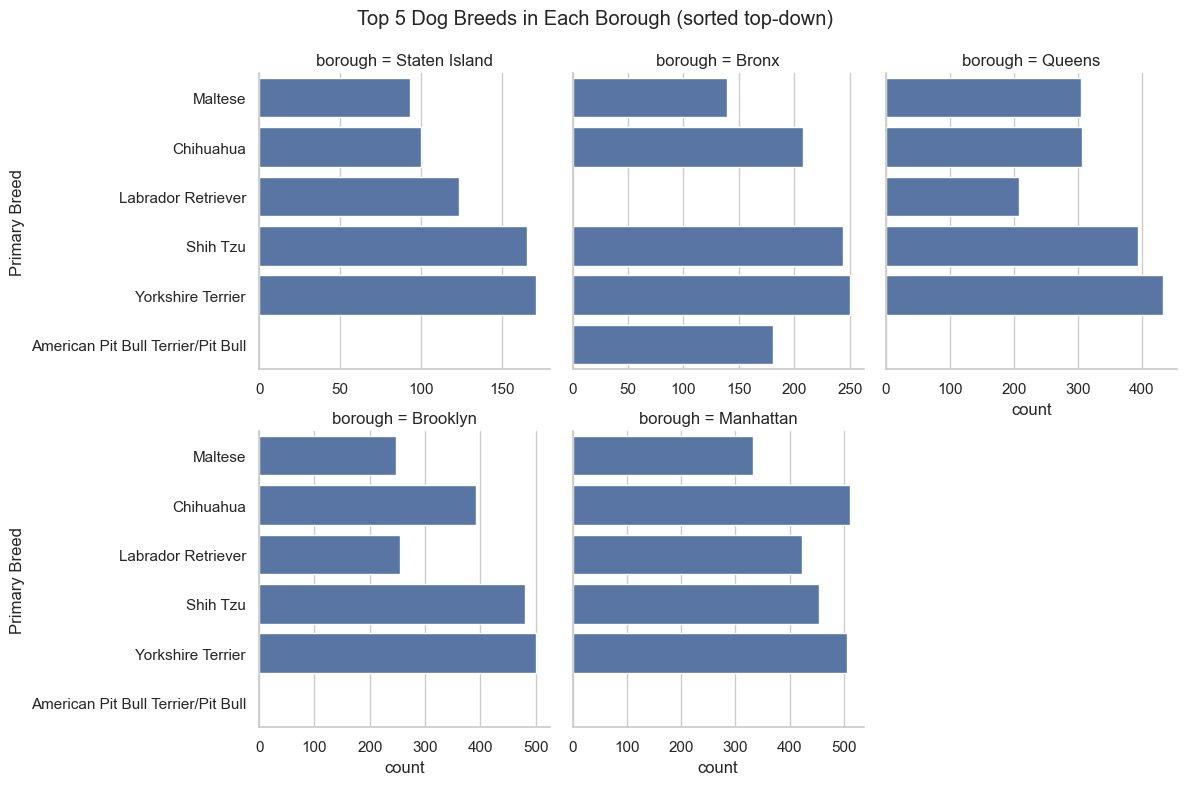

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# 各行ごとにソート（全体のグラフ順を決める）
top5_per_borough_sorted = top5_per_borough.sort_values("count", ascending=True)

g = sns.catplot(
    data=top5_per_borough_sorted,
    kind="bar",
    x="count",
    y="Primary Breed",
    col="borough",
    col_wrap=3,
    height=4,
    sharex=False,
)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Top 5 Dog Breeds in Each Borough (sorted top-down)")
plt.show()